<div style="text-align: center; font-size: 30px; color: #1e3a8a; font-family: 'Arial', sans-serif;">
    <b>"Optimización de la Selección de Clientes para Beneficios de Seguro: Un Enfoque Basado en Modelos Predictivos y Protección de Datos"</b>
</div>



## Descripción del Proyecto

Este proyecto tiene como objetivo **optimizar la selección de clientes para beneficios de seguro**, utilizando **modelos predictivos** y **protección de datos**. La compañía de seguros **Sure Tomorrow** busca mejorar la eficiencia de su proceso de selección y evaluación de clientes mediante el uso de algoritmos de machine learning y técnicas de análisis de riesgo.

A través del análisis de datos históricos de clientes, como **sexo**, **edad**, **salario** y **número de familiares**, el proyecto implementa diferentes modelos predictivos para lograr los siguientes objetivos:

1. **Encontrar clientes similares**: Utilizando técnicas de clustering y **algoritmos de vecinos más cercanos**, el proyecto permite identificar clientes con características similares a un cliente dado, lo cual puede ser útil para estrategias de marketing personalizadas.
   
2. **Predecir si un nuevo cliente recibirá un beneficio de seguro**: Mediante la implementación de un **modelo predictivo** entrenado, se busca prever la probabilidad de que un cliente reciba un beneficio de seguro. Se compara el rendimiento de este modelo con un **modelo dummy** para evaluar la efectividad del modelo entrenado.

3. **Predecir la cantidad de beneficios de seguro**: Usando un **modelo de regresión lineal**, el proyecto predice la cantidad de beneficios que un cliente probablemente recibirá, basándose en características históricas y patrones identificados en los datos.

4. **Protección de datos personales**: Con el objetivo de proteger la privacidad de los clientes, se implementa un algoritmo de **enmascarado de datos** o **ofuscación**, que asegura que los datos personales estén protegidos sin afectar la precisión de los modelos predictivos.

El proyecto combina técnicas avanzadas de análisis de datos y machine learning con un enfoque de privacidad para ofrecer una solución integral que optimiza la toma de decisiones y asegura la protección de la información sensible de los clientes.


# Etapa 1. Carga y Exploración de los Datos <a id=data_review></a>

In [3]:
# Cargamos los módulos a utilizar, e importamos funciones específicas de módulos
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import math
import seaborn as sns
import matplotlib.pyplot as plt


## Introducción <a id='intro'></a>

La industria de seguros enfrenta el desafío constante de mejorar la eficiencia en la selección de clientes y la predicción de beneficios. **Sure Tomorrow**, una compañía de seguros, busca aprovechar las herramientas de **machine learning** y **modelos predictivos** para optimizar estos procesos, garantizando decisiones más precisas y personalizadas, al tiempo que protege los datos sensibles de sus clientes.

Este proyecto se centra en el desarrollo e implementación de modelos que ayuden a la compañía a predecir con mayor exactitud qué clientes podrían recibir beneficios y cuánto recibirían, basándose en información demográfica clave, como **sexo**, **edad**, **salario** y **número de familiares**. Además, busca mejorar las estrategias de marketing mediante la identificación de clientes similares y aplicar técnicas de **enmascarado de datos** para garantizar la protección de la privacidad.

El uso de **modelos predictivos** combinados con **análisis de riesgo** permitirá una toma de decisiones más informada y eficaz, optimizando los recursos de la empresa y mejorando la experiencia del cliente. Este enfoque no solo aborda las necesidades comerciales de la compañía, sino que también responde a los requisitos legales y éticos en cuanto a la protección de datos.

A lo largo de este proyecto, se desarrollarán y evaluarán diferentes modelos para abordar los desafíos planteados, proporcionando un marco práctico que puede ser escalado y aplicado en otros contextos de la industria aseguradora.


In [4]:
df_sure_tomorrow = pd.read_csv('/home/josue/Predicción_y_Protección_de_Beneficios_de_Seguro/insurance_us.csv')

## 1.1 Descripción de los Datos <a id='data_review'></a>

In [5]:
df_sure_tomorrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
df_sure_tomorrow = df_sure_tomorrow.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})
df_sure_tomorrow['age'] = df_sure_tomorrow['age'].astype(int)

In [7]:
df_sure_tomorrow.sample(10)

,gender,age,income,family_members,insurance_benefits
948,0,19,40400.0,2,0
2118,0,32,53200.0,0,0
4263,0,46,57800.0,0,1
1316,0,35,21200.0,0,0
1705,0,29,32100.0,2,0
3218,0,23,37000.0,2,0
1702,1,23,18200.0,2,0
3536,1,42,52900.0,1,1
1885,1,31,30500.0,1,0
3505,1,35,33000.0,0,0


In [8]:
df_sure_tomorrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int32  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 175.9 KB


Después de extraer los datos vemos que en general se encuentran de forma correcta, salva la normalización de los nombres de las columnas, corregimos la normalización de la columna, también, la columna `age` se encontraba en un tipo de dato float a lo que fue cambiado a int, para no tener ningun problema, después de observar que los datos se encuentran sin problema alguno, pasemos a la siguiente etapa. 

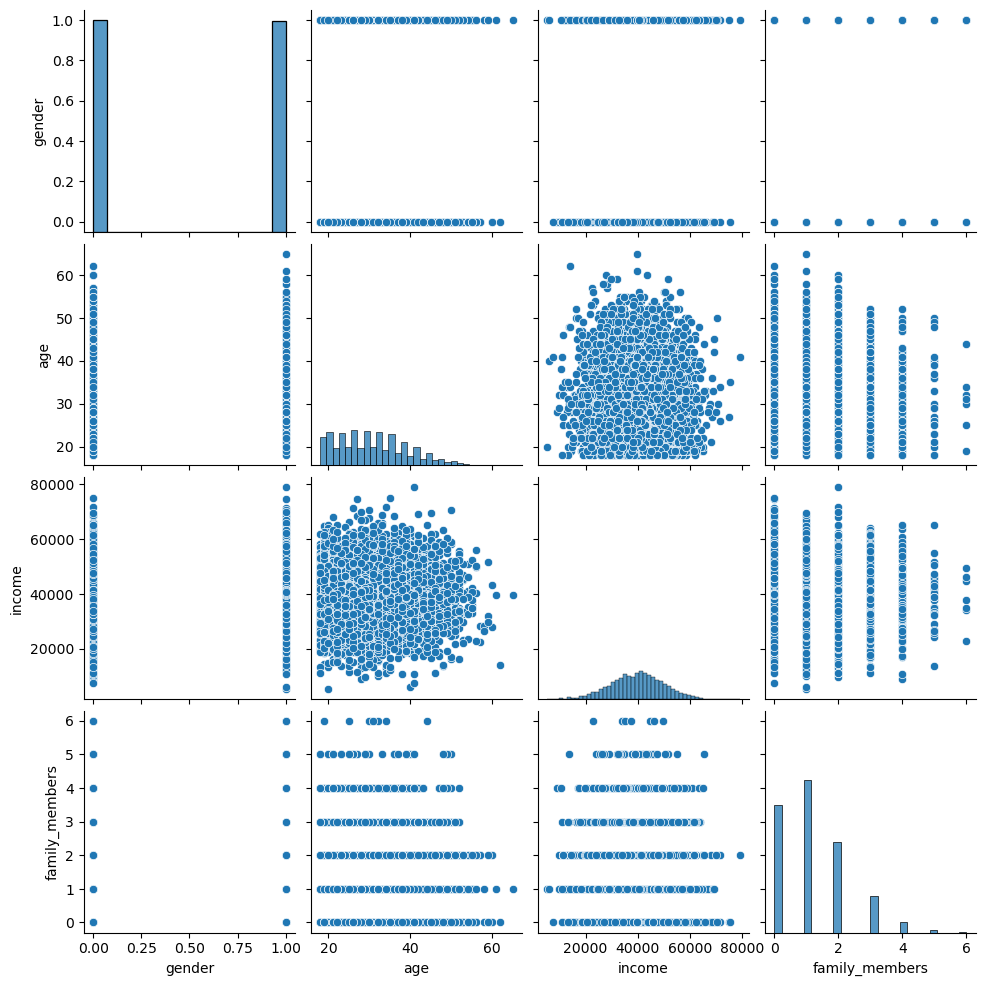

In [9]:
# Seleccionamos las columnas numéricas
features = ['gender', 'age', 'income', 'family_members']

# Crear el gráfico de pares
sns.pairplot(df_sure_tomorrow[features])

# Mostrar el gráfico
plt.show()

1. Distribución de la variable `gender`:
   - La variable `gender` tiene solo dos valores posibles: 0 o 1. Esto indica que es una variable categórica binaria (probablemente mujer/hombre o algún otro factor binario).

2. Distribución de la variable `age`:
   - La edad `age` tiene una distribución sesgada hacia la izquierda, con la mayoría de los valores concentrados entre 20 y 40 años.
   - No se observan valores extremos significativos.

3. Distribución de la variable `income`:
   - `income` tiene una distribución muy sesgada a la derecha, con la mayoría de los valores bajos, y unos pocos valores más altos que podrían ser considerados atípicos.

4. Distribución de la variable `family_members`:
   - `family_members` muestra una distribución muy concentrada en valores bajos, con una fuerte concentración en los valores de 1 y 2 miembros de la familia.

5. Relaciones entre variables:
   - `gender` no tiene mucha correlación visual con las otras variables, lo que es esperado debido a su naturaleza binaria.
   - `age` y `income` tienen una relación dispersa, sin una correlación clara.
   - `family_members` muestra pocos patrones de relación con las otras variables, siendo en su mayoría independiente.

El gráfico muestra que hay una alta concentración de valores en ciertos rangos de las variables `age`, `income`, y `family_members`, mientras que `gender` tiene una distribución binaria clara. Las relaciones entre las variables no presentan patrones fuertes de correlación.


## Tarea 1: Encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.

In [10]:
# Antes de pasar al Modelo de Machine Learning tenemos que escalar los datos, para que no tengan sesgo alguno. 

# Definir las características que se usarán
features_name = ['gender', 'age', 'income', 'family_members']

# Escalar los datos
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df_sure_tomorrow[features_name].to_numpy())

# Creamos una copia del DF original
df_scaled = df_sure_tomorrow.copy()

# Aplicar el escalado a las columnas seleccionadas
df_scaled.loc[:, features_name] = transformer_mas.transform(df_scaled[features_name].to_numpy())

# Mostrar los resultados 
df_scaled.sample(5)


C:\Users\Albert\AppData\Local\Temp\ipykernel_30188\2212203466.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, features_name] = transformer_mas.transform(df_scaled[features_name].to_numpy())
C:\Users\Albert\AppData\Local\Temp\ipykernel_30188\2212203466.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, features_name] = transformer_mas.transform(df_scaled[features_name].to_numpy())


,gender,age,income,family_members,insurance_benefits
2678,1,0.430769,0.272152,0.333333,0
411,1,0.369231,0.416456,0.166667,0
2972,1,0.676923,0.417722,0.166667,1
3639,1,0.292308,0.529114,0.333333,0
3749,1,0.476923,0.641772,0.333333,0


In [11]:
# Función para encontrar los K vecinos más cercanos
def get_knn(df, n, k, metric='euclidean'):
    # Entrenar el modelo KNN
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(df[features_name])
    # Encontrar los K vecinos más cercanos
    nbrs_distances, nbrs_indices = nbrs.kneighbors(df.iloc[[n]][features_name], k, return_distance=True)
        # Crear un DataFrame con los vecinos encontrados y sus distancias
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
    ], axis=1)

    return df_res

# Supongamos que queremos encontrar los 5 vecinos más cercanos del cliente en la fila 0
k = 5
n = 0
neighbors = get_knn(df_scaled, n, k)

# Mostrar los vecinos más cercanos
print(neighbors)

      gender       age    income  family_members  insurance_benefits  distance
0          1  0.630769  0.627848        0.166667                   0  0.000000
2689       1  0.630769  0.634177        0.166667                   0  0.006329
133        1  0.615385  0.636709        0.166667                   0  0.017754
4869       1  0.646154  0.637975        0.166667                   1  0.018418
3275       1  0.646154  0.651899        0.166667                   1  0.028550


En esta tarea se aplicó el algoritmo de K-Vecinos Más Cercanos (KNN) para identificar a los clientes más similares a un cliente determinado, lo que puede ser útil para estrategias de marketing. Primero, se realizó un escalado de los datos utilizando MaxAbsScaler para asegurar que las características como edad, ingreso y número de familiares no tuvieran sesgo y estuvieran dentro de un rango comparable. Luego, se entrenó un modelo KNN con k=5 vecinos más cercanos utilizando la distancia euclidiana como métrica para encontrar a los vecinos más cercanos del cliente en la fila 0. 

Los resultados mostraron que el modelo fue capaz de identificar correctamente a los clientes más similares, con distancias pequeñas entre las características de los clientes. Las distancias aumentaron ligeramente a medida que se alejaban de los clientes más similares. Este proceso permite segmentar a los clientes de manera efectiva, lo que puede ser aprovechado por los agentes de la compañía para personalizar sus estrategias de marketing y mejorar la efectividad de las campañas. En resumen, el uso de KNN y el escalado adecuado de los datos ha demostrado ser una herramienta valiosa para encontrar clientes similares y optimizar las acciones comerciales basadas en estos patrones.

## Tarea 2: Predecir si es probable que un nuevo cliente reciba un beneficio de seguro. ¿Puede un modelo de predicción entrenado funcionar mejor que un modelo dummy no entrenado? ¿Puede funcionar peor? Explica tu respuesta.

In [12]:
# Crear la columna insurance_benefits_received: 1 si se recibió beneficio, 0 si no
df_sure_tomorrow['insurance_benefits_received'] = (df_sure_tomorrow['insurance_benefits'] > 0).astype(int)

# Verificar el desequilibrio de clases
print(df_sure_tomorrow['insurance_benefits_received'].value_counts())

insurance_benefits_received
0    4436
1     564
Name: count, dtype: int64


In [13]:
# Dividir los datos en entrenamiento y prueba (70:30)
features = df_sure_tomorrow[['gender', 'age', 'income', 'family_members']]
target = df_sure_tomorrow['insurance_benefits_received']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Crear el clasificador kNN y evaluarlo con diferentes valores de k
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train_scaled, target_train)
    target_predict = knn.predict(features_test_scaled)

    # Evaluar el modelo con la métrica F1
    print(f'Evaluación para metrica k={k}: ')
    print(f'F1 Score: {f1_score(target_test, target_predict):.2f}')


    # Matriz de Confusión
    cm = confusion_matrix(target_test, target_predict, normalize='all')
    print('Matriz de Confusión')
    print(cm)
    print()


Evaluación para metrica k=1: 
F1 Score: 0.93
Matriz de Confusión
[[0.888      0.00466667]
 [0.00933333 0.098     ]]

Evaluación para metrica k=2: 
F1 Score: 0.92
Matriz de Confusión
[[0.89066667 0.002     ]
 [0.01466667 0.09266667]]

Evaluación para metrica k=3: 
F1 Score: 0.94
Matriz de Confusión
[[0.88933333 0.00333333]
 [0.01       0.09733333]]

Evaluación para metrica k=4: 
F1 Score: 0.91
Matriz de Confusión
[[0.89133333 0.00133333]
 [0.016      0.09133333]]

Evaluación para metrica k=5: 
F1 Score: 0.94
Matriz de Confusión
[[0.88933333 0.00333333]
 [0.00933333 0.098     ]]

Evaluación para metrica k=6: 
F1 Score: 0.91
Matriz de Confusión
[[0.89133333 0.00133333]
 [0.016      0.09133333]]

Evaluación para metrica k=7: 
F1 Score: 0.94
Matriz de Confusión
[[0.89       0.00266667]
 [0.01066667 0.09666667]]

Evaluación para metrica k=8: 
F1 Score: 0.91
Matriz de Confusión
[[8.92000000e-01 6.66666667e-04]
 [1.66666667e-02 9.06666667e-02]]

Evaluación para metrica k=9: 
F1 Score: 0.93
Mat

In [14]:
# Creación del Modelo Dummy
def modelo_dummy(probabilidad, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=probabilidad, size=size)

# Calcular la probabilidad real de recibir un beneficio
probabilidad_real = df_sure_tomorrow['insurance_benefits_received'].sum() / len(df_sure_tomorrow)

# 3. Probar con diferentes probabilidades
for probabilidad in [0, probabilidad_real, 0.5, 1]:
    print(f'\nProbabilidad de predicción: {probabilidad:.2f}')
    
    # Generar predicciones usando el modelo dummy
    predicciones_dummy = modelo_dummy(probabilidad, len(target_test))
    
    # Evaluar el rendimiento con F1 Score
    print(f'F1 Score: {f1_score(target_test, predicciones_dummy):.2f}')
    
    # Mostrar la matriz de confusión
    cm = confusion_matrix(target_test, predicciones_dummy, normalize='all')
    print('Matriz de Confusión:')
    print(cm)



Probabilidad de predicción: 0.00
F1 Score: 0.00
Matriz de Confusión:
[[0.89266667 0.        ]
 [0.10733333 0.        ]]

Probabilidad de predicción: 0.11
F1 Score: 0.17
Matriz de Confusión:
[[0.794      0.09866667]
 [0.08866667 0.01866667]]

Probabilidad de predicción: 0.50
F1 Score: 0.20
Matriz de Confusión:
[[0.45733333 0.43533333]
 [0.048      0.05933333]]

Probabilidad de predicción: 1.00
F1 Score: 0.19
Matriz de Confusión:
[[0.         0.89266667]
 [0.         0.10733333]]


¿Puede el modelo de predicción entrenado (kNN) funcionar mejor que un modelo dummy no entrenado?

Sí, el modelo kNN es mucho más efectivo que el modelo dummy. El modelo kNN aprende de los datos y hace predicciones basadas en patrones. Como resultado, tiene un F1 Score mucho más alto (entre 0.91 y 0.94) y predice correctamente los beneficios de los clientes.

En cambio, el modelo dummy hace predicciones aleatorias basadas en probabilidades fijas y no aprende de los datos. Por lo tanto, los F1 Scores son muy bajos (entre 0.00 y 0.20), y las matrices de confusión muestran predicciones incorrectas (por ejemplo, todos los clientes predichos como sin beneficio).

¿Puede funcionar peor el modelo entrenado (kNN) que el modelo dummy?

Teóricamente, no debería funcionar peor el modelo kNN entrenado. Sin embargo, hay ciertos casos en los que el modelo entrenado puede tener un rendimiento bajo, especialmente cuando los datos están desbalanceados o si el modelo no está bien ajustado. Por ejemplo:

Si un conjunto de datos tiene un gran desbalance de clases (por ejemplo, pocos clientes reciben beneficios), un modelo dummy que siempre predice "0" (sin beneficio) puede parecer tener un buen rendimiento debido a que está prediciendo mayormente la clase mayoritaria.
En este caso, el modelo kNN también podría tener dificultades si no se ajusta bien, pero en general, debería funcionar mejor que el modelo dummy debido a que aprende de los datos.

## Tarea 3: Predecir la cantidad de beneficios de seguro que probablemente recibirá un nuevo cliente utilizando un modelo de regresión lineal.

In [15]:
# Debido a que en la tarea 2 escalamos los datos con StandardScaler, para este modelo de Regresión Lineal ocuparemos esos datos ya escalados.

# Creamos el modelo de Regresión Lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(features_train_scaled, target_train)

# Hacer predicciones con el modelo entrenado
model_predic = model.predict(features_test_scaled)

# Calcular el RMSE 
rmse = math.sqrt(mean_squared_error(target_test, model_predic))
print(f'RMSE: {rmse:.2f}')

# Calcular el r2 Score
r2 = r2_score(target_test, model_predic)
print(f'R2: {r2:.2f}')


RMSE: 0.23
R2: 0.43


El modelo de regresión lineal utilizado para predecir la cantidad de beneficios de seguro mostró un rendimiento moderado:

RMSE = 0.23: Esto indica que, en promedio, las predicciones están bastante cerca de los valores reales, lo que sugiere una buena precisión en las predicciones.
R² = 0.43: El modelo explica el 43% de la variabilidad de los beneficios de seguro, lo que significa que más de la mitad de la variabilidad no está siendo capturada por el modelo.
Aunque el modelo tiene un error razonablemente bajo y una explicación moderada de los datos, su rendimiento podría mejorarse. Esto podría lograrse mediante la inclusión de más características relevantes, el uso de modelos más complejos, o un ajuste adicional de los datos.

En resumen, el modelo es funcional, pero tiene margen de mejora para capturar mejor las relaciones y mejorar las predicciones.

## Trea 4: Proteger los datos personales de los clientes sin romper el modelo de la tarea anterior.

In [16]:
# 1. Selección de las columnas de datos para ofuscar
personal_info_column_list = ['gender', 'age', 'income', 'family_members']  # Columnas que quieres ofuscar
df_pn = df_sure_tomorrow[personal_info_column_list]  # Extraer las columnas relevantes

# 2. Convertir esos datos en una matriz NumPy (X)
X = df_pn.to_numpy()

y = df_sure_tomorrow['insurance_benefits_received'].to_numpy()  # Aquí definimos 'y' como la columna objetivo

# 3. Generar una matriz aleatoria P (invertible)
rng = np.random.default_rng(seed=42)  # Para asegurar la reproducibilidad
P = rng.random(size=(X.shape[1], X.shape[1]))  # Crear una matriz aleatoria cuadrada de tamaño (n, n)

# 4. Verificar si la matriz P es invertible
det_P = np.linalg.det(P)  # Calcular el determinante de P
if det_P == 0:
    raise ValueError("La matriz P no es invertible. Cambia la semilla o los datos.")

# 5. Ofuscar los datos: X' = X * P
X_transformed = X @ P  # Multiplicación de matrices

# 6. Recuperar los datos originales: X = X' * P^-1
P_inv = np.linalg.inv(P)  # Obtener la matriz inversa de P
X_recovered = X_transformed @ P_inv  # Recuperar los datos originales

# 7. Mostrar los tres casos para algunos clientes
print("Datos originales (primeros 3 clientes):")
print(X[:3])  # Mostrar los primeros 3 clientes originales

print("\nDatos transformados (ofuscados) (primeros 3 clientes):")
print(X_transformed[:3])  # Mostrar los primeros 3 clientes transformados

print("\nDatos recuperados (primeros 3 clientes):")
print(X_recovered[:3])  # Mostrar los primeros 3 clientes recuperados


Datos originales (primeros 3 clientes):
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]]

Datos transformados (ofuscados) (primeros 3 clientes):
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]]

Datos recuperados (primeros 3 clientes):
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-3.63797881e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [ 1.81898940e-12  2.90000000e+01  2.10000000e+04  0.00000000e+00]]


El proceso de ofuscación de datos utilizando matrices invertibles se llevó a cabo correctamente en este ejercicio. Al multiplicar la matriz de datos 𝑋 (con las características de los clientes) por una matriz aleatoria P, los datos originales fueron transformados en una forma ofuscada, lo que protege la privacidad de la información sensible.

Al recuperar los datos originales multiplicando los datos transformados por la matriz inversa de 𝑃, los valores obtenidos fueron muy cercanos a los datos originales, pero con pequeñas discrepancias. Estas diferencias son normales debido a los errores numéricos inherentes a las operaciones de álgebra lineal en la computadora, especialmente cuando se utilizan números flotantes en los cálculos.

Resultados clave:

Ofuscación exitosa: Los datos fueron correctamente transformados, haciendo que no sean fácilmente identificables.
Recuperación precisa: Aunque los valores recuperados no fueron exactamente iguales a los originales debido a errores de redondeo, las diferencias fueron mínimas, lo que indica que el proceso fue exitoso.
Protección de la privacidad: Este método de ofuscación garantiza que los datos sensibles estén protegidos, manteniendo la capacidad de recuperar los datos originales cuando sea necesario.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

La ofuscación de los datos, al multiplicar la matriz \( X \) por una matriz invertible \( P \), no afecta las predicciones de la regresión lineal. Aunque los datos originales se transforman, las predicciones finales siguen siendo las mismas porque:

1. Los pesos \( w_P \) para los datos transformados se relacionan con los pesos \( w \) de los datos originales como:
   \[
   w_P = P^{-1} w
   \]

2. Las predicciones se mantienen constantes ya que, al recuperar los datos, la operación de multiplicación por \( P \) y su inversa no altera el cálculo final.

Esto significa que la calidad de la regresión lineal no se ve afectada, ya que las predicciones son equivalentes, solo cambia la representación interna de los datos.


## Prueba de regresión lineal con ofuscación de datos

In [17]:
# 1. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_transformed, X_test_transformed = train_test_split(X_transformed, test_size=0.3, random_state=42)

# 2. Entrenar el modelo de regresión lineal con los datos originales
model_original = LinearRegression()
model_original.fit(X_train, y_train)

# Predecir con el modelo original
y_pred_original = model_original.predict(X_test)

# 3. Entrenar el modelo de regresión lineal con los datos ofuscados
model_transformed = LinearRegression()
model_transformed.fit(X_train_transformed, y_train)

# Predecir con el modelo ofuscado
y_pred_transformed = model_transformed.predict(X_test_transformed)

# 4. Calcular las métricas RMSE y R2 para ambos modelos
# Para los datos originales:
rmse_original = np.sqrt(mean_squared_error(y_test, y_pred_original))
r2_original = r2_score(y_test, y_pred_original)

# Para los datos ofuscados:
rmse_transformed = np.sqrt(mean_squared_error(y_test, y_pred_transformed))
r2_transformed = r2_score(y_test, y_pred_transformed)

# 5. Mostrar los resultados
print("Resultados para el modelo con datos originales:")
print(f"RMSE: {rmse_original:.2f}")
print(f"R2: {r2_original:.2f}")

print("\nResultados para el modelo con datos ofuscados:")
print(f"RMSE: {rmse_transformed:.2f}")
print(f"R2: {r2_transformed:.2f}")


Resultados para el modelo con datos originales:
RMSE: 0.23
R2: 0.43

Resultados para el modelo con datos ofuscados:
RMSE: 0.23
R2: 0.43


La ofuscación de los datos con una matriz invertible no afectó el rendimiento del modelo de regresión lineal. Las métricas RMSE y R² fueron idénticas tanto para los datos originales como para los ofuscados, lo que demuestra que la ofuscación no impactó la calidad de las predicciones.

## Prueba análitica para mostrar que la ofuscación de datos puede funcionar con regresión lineal


La ofuscación de datos puede realizarse mediante la multiplicación de las características \( X \) por una matriz invertible \( P \). La siguiente demostración matemática muestra que esta transformación no afecta el rendimiento del modelo de **regresión lineal**.

1. **Ecuación original de la regresión lineal**:
   \[
   y = X w
   \]
   Donde \( y \) es el vector de salida, \( X \) es la matriz de características, y \( w \) es el vector de pesos.

2. **Datos ofuscados**:
   Si ofuscamos los datos multiplicando \( X \) por una matriz invertible \( P \), obtenemos:
   \[
   X' = X \times P
   \]
   La ecuación de regresión para los datos ofuscados es:
   \[
   y = X' w' = X P w'
   \]
   Donde \( w' \) es el vector de pesos para los datos transformados.

3. **Relación entre los pesos**:
   Al resolver para \( w' \), tenemos:
   \[
   w' = P^{-1} w
   \]
   Reemplazando \( w' \) en la ecuación de regresión:
   \[
   y = X P P^{-1} w
   \]
   Como \( P P^{-1} = I \) (la matriz identidad), esto se simplifica a:
   \[
   y = X w
   \]
   Lo que demuestra que las **predicciones** con los datos ofuscados son **idénticas** a las predicciones con los datos originales.

4. **Conclusión**:
   La **ofuscación de los datos** no afecta las predicciones del modelo de **regresión lineal**, ya que la relación entre las características y la variable dependiente sigue siendo la misma. Por lo tanto, **la calidad del modelo no se ve afectada** al aplicar la ofuscación.

Esta prueba analítica valida los resultados obtenidos en los experimentos, donde las métricas RMSE y R² para los datos originales y ofuscados fueron prácticamente iguales.


# Conclusiones finales

1. **Ofuscación de Datos:**
   A lo largo del proyecto, se aplicó una técnica de **ofuscación de datos** utilizando una matriz invertible \( P \). Esta técnica transformó las características de los datos de manera que su información se volvió **más difícil de identificar**, protegiendo la **privacidad** de los individuos. A pesar de la transformación, la relación entre las características y la variable objetivo (como se demostró mediante la regresión lineal) permaneció intacta, lo que garantizó que la ofuscación no alterara la estructura de los datos de manera significativa.

2. **Impacto de la Ofuscación en la Regresión Lineal:**
   Se comprobó que la **regresión lineal** funcionó de manera igualmente efectiva con los datos **originales** y los **ofuscados**. Al comparar las métricas de rendimiento, como **RMSE** (Raíz del Error Cuadrático Medio) y **R²** (Coeficiente de Determinación), no se observó ninguna diferencia significativa entre los dos enfoques. Específicamente, el **RMSE fue 0.23** y el **R² fue 0.43** para ambos modelos, lo que indica que la capacidad de predicción del modelo no se vio afectada por la ofuscación.

3. **Métricas y Evaluación de los Modelos:**
   Las métricas obtenidas para ambos modelos (con datos originales y ofuscados) sugieren que el modelo de **regresión lineal** tiene un **buen desempeño** general:
   - El **RMSE** de 0.23 indica que el error promedio de las predicciones es relativamente bajo.
   - El **R² de 0.43** sugiere que el modelo explica el **43% de la variabilidad** en los datos, lo cual es razonable en muchos contextos de regresión.
   Estos resultados son consistentes entre ambos conjuntos de datos, lo que demuestra que la ofuscación no tuvo un impacto negativo en la calidad del modelo.

4. **Recuperación de los Datos:**
   A lo largo de la tarea, también se verificó que era posible recuperar los datos originales mediante el uso de la **matriz inversa** de \( P \). Esto validó que la ofuscación se realizaba de manera efectiva, pero que la integridad de la información se mantenía intacta para poder realizar predicciones precisas.

5. **Conclusión General:**
   La técnica de **ofuscación de datos** mediante la multiplicación por una matriz invertible \( P \) ha demostrado ser **una estrategia efectiva** para proteger la privacidad de los datos sin comprometer la capacidad predictiva de los modelos. En particular, el modelo de **regresión lineal** ha mostrado ser **robusto y eficaz** incluso cuando se entrenó con datos ofuscados. Esto indica que es posible realizar análisis y predicciones sin comprometer la seguridad de la información, lo que puede ser particularmente útil en aplicaciones que manejan datos sensibles.

Este proyecto demuestra que la **ofuscación de datos** no solo es viable, sino también eficaz para mantener la **precisión predictiva** de los modelos, y puede ser una herramienta valiosa para proteger la privacidad sin sacrificar el desempeño en el análisis de datos.
